
# Detection error tradeoff (DET) curve

from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_det.html

In this example, we compare two binary classification multi-threshold metrics:
the Receiver Operating Characteristic (ROC) and the Detection Error Tradeoff
(DET). For such purpose, we evaluate two different classifiers for the same
classification task.

ROC curves feature true positive rate (TPR) on the Y axis, and false positive
rate (FPR) on the X axis. This means that the top left corner of the plot is the
"ideal" point - a FPR of zero, and a TPR of one.

DET curves are a variation of ROC curves where False Negative Rate (FNR) is
plotted on the y-axis instead of the TPR. In this case the origin (bottom left
corner) is the "ideal" point.

<div class="alert alert-info"><h4>Note</h4><p>- See :func:`sklearn.metrics.roc_curve` for further information about ROC
      curves.

    - See :func:`sklearn.metrics.det_curve` for further information about
      DET curves.

    - This example is loosely based on
      `sphx_glr_auto_examples_classification_plot_classifier_comparison.py`
      example.

    - See `sphx_glr_auto_examples_model_selection_plot_roc_crossval.py` for
      an example estimating the variance of the ROC curves and ROC-AUC.</p></div>


## Generate synthetic data



In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Define the classifiers

Here we define two different classifiers. The goal is to visually compare their
statistical performance across thresholds using the ROC and DET curves. There
is no particular reason why these classifiers are chosen other classifiers
available in scikit-learn.



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025, dual="auto")),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

## Plot ROC and DET curves

DET curves are commonly plotted in normal deviate scale. To achieve this the
DET display transforms the error rates as returned by the
:func:`~sklearn.metrics.det_curve` and the axis scale using
`scipy.stats.norm`.



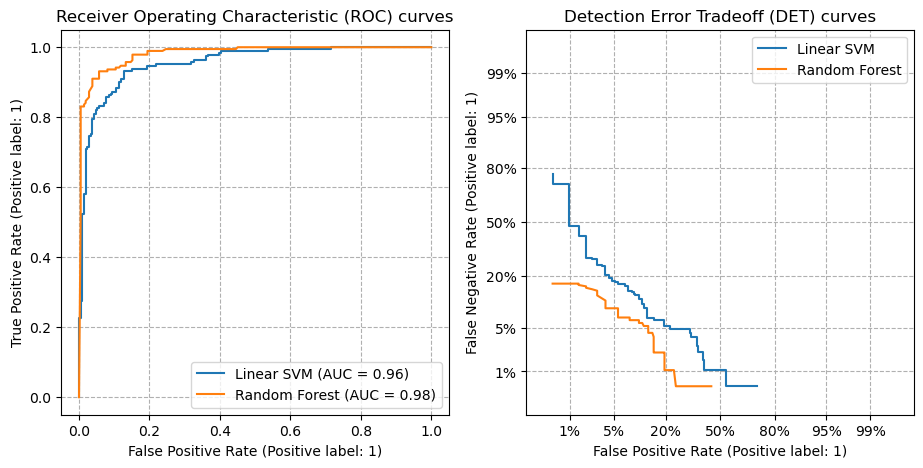

In [7]:
import matplotlib.pyplot as plt

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

Notice that it is easier to visually assess the overall performance of
different classification algorithms using DET curves than using ROC curves. As
ROC curves are plot in a linear scale, different classifiers usually appear
similar for a large part of the plot and differ the most in the top left
corner of the graph. On the other hand, because DET curves represent straight
lines in normal deviate scale, they tend to be distinguishable as a whole and
the area of interest spans a large part of the plot.

DET curves give direct feedback of the detection error tradeoff to aid in
operating point analysis. The user can then decide the FNR they are willing to
accept at the expense of the FPR (or vice-versa).

